# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and the dataset.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [31]:
df.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [32]:
# your code here
#df.drop(columns='Id',inplace=True)
df.shape

(1460, 81)

You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [33]:
# your code here
nulos_columnas = df.isnull().sum()
nulos_columnas

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [34]:
nulos_columnas[nulos_columnas > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [35]:
porcentaje_nulos = nulos_columnas[nulos_columnas > 0]/df.shape[0]
porcentaje_nulos

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [36]:
# your code here
columnas_a_eliminar=porcentaje_nulos[porcentaje_nulos>0.20].index
columnas_a_eliminar

df.drop(columns = columnas_a_eliminar, inplace = True)

In [37]:
df.shape

(1460, 76)

Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

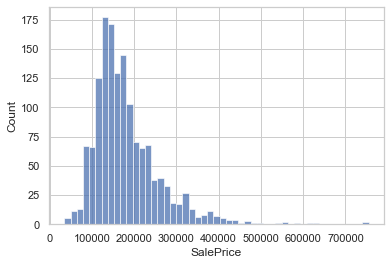

In [38]:
# your code here
sns.set_theme(style="whitegrid")

sns.histplot(df.SalePrice)

In [39]:
# your comment here
'''la distribucion de los datos no es normal, tiene una tendencia hacia la izquierda, esto significa que la mediana esta mas cerca del primer quartil '''

'la distribucion de los datos no es normal, tiene una tendencia hacia la izquierda, esto significa que la mediana esta mas cerca del primer quartil '

## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

In [50]:
# your code here

#eliminando valores outliers
from scipy import stats
df = df[np.abs(df.SalePrice-df.SalePrice.mean()) <= (3*df.SalePrice.std())]
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [57]:

#aplicando raiz cuadrada a toda la column

df.SalePriceAdjusted = df.SalePrice.apply(np.sqrt)

C:\Users\fhernandezcortez\AppData\Local\Temp\ipykernel_15212\2909227850.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.SalePriceAdjusted = df.SalePrice.apply(np.sqrt)


0       456.618002
1       426.028168
2       472.757866
3       374.165739
4       500.000000
           ...    
1455    418.330013
1456    458.257569
1457    516.236380
1458    376.994695
1459    384.057287
Name: SalePrice, Length: 1419, dtype: float64

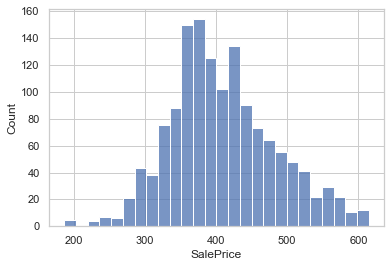

In [62]:
sns.histplot(df.SalePriceAdjusted)
df.SalePriceAdjusted

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

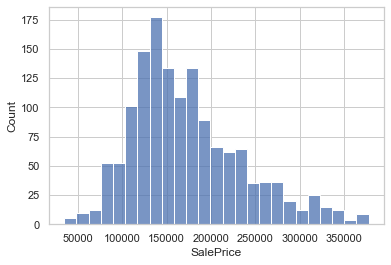

In [63]:
sns.histplot(df.SalePrice)

## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

'aqui estoy realmente entre el violinplot y el scatterplot, pero en general se esperaria que\nhubiera un comportamiento lineal entre el numero de cuartos y el precio, entre mas cuartos, mayor precio'

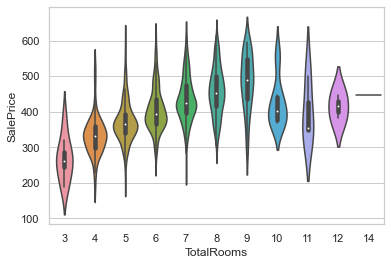

In [146]:
# your code here
# add cells as needed

df['TotalRooms'] = df.BedroomAbvGr + df.KitchenAbvGr + df.FullBath + df.HalfBath + df.BsmtFullBath + df.BsmtHalfBath

#sns.scatterplot(x=df.LotArea, y=df.SalePrice)
sns.violinplot(x=df.TotalRooms, y=df.SalePriceAdjusted) 
'''aqui estoy realmente entre el violinplot y el scatterplot, pero en general se esperaria que
hubiera un comportamiento lineal entre el numero de cuartos y el precio, entre mas cuartos, mayor precio'''

In [130]:
df[['GrLivArea','LotArea','GarageArea']]

'''Para esta parte, no voy a tomar en consideracion gr o garage area, para este calculo solo me va a importar el area del lote, que lo considero como el area total ref https://math.answers.com/geometry/What_is_the_difference_between_floor_area_and_lot_area
 ademas como se puede observar en el df, el lot area es mucho mayor a las demas'''

,GrLivArea,LotArea,GarageArea
0,1710,8450,548
1,1262,9600,460
2,1786,11250,608
3,1717,9550,642
4,2198,14260,836
...,...,...,...
1455,1647,7917,460
1456,2073,13175,500
1457,2340,9042,252
1458,1078,9717,240


<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

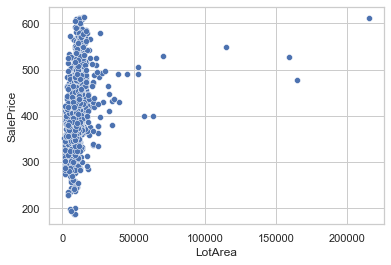

In [135]:
sns.scatterplot(y=df.SalePriceAdjusted, x=df.LotArea)

In [124]:
df['AgeofHouse'] = df.YearBuilt.max() - df['YearBuilt']

df['HouseRemodel'] = df.YearRemodAdd.max() - df['YearRemodAdd']


0        7
1       34
2        8
3       40
4       10
        ..
1455    10
1456    22
1457     4
1458    14
1459    45
Name: HouseRemodel, Length: 1419, dtype: int64

<AxesSubplot:xlabel='AgeofHouse', ylabel='SalePrice'>

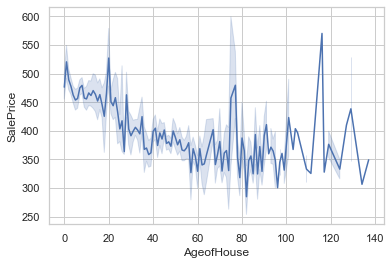

In [125]:
sns.lineplot(x=df.AgeofHouse , y=df.SalePriceAdjusted)

<AxesSubplot:xlabel='HouseRemodel', ylabel='SalePrice'>

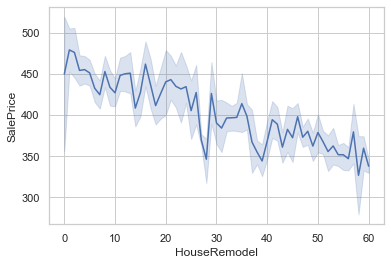

In [127]:
sns.lineplot(x=df.HouseRemodel, y=df.SalePriceAdjusted)

<AxesSubplot:xlabel='SalePrice', ylabel='Neighborhood'>

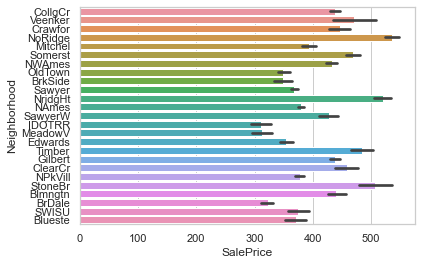

In [99]:
sns.barplot(y = df.Neighborhood, x = df.SalePriceAdjusted, orient = 'h')

## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like below:

![Corr Heatmap](heatmap.png)

<AxesSubplot:>

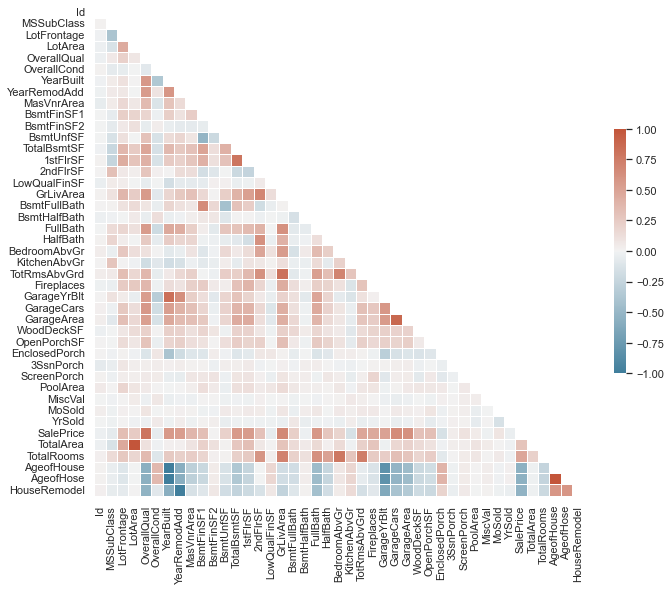

In [139]:
# your code here
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [ ]:
# your comment here
'''overal quality, year built, year remodeled, y el numero de cuartos tienen tendencia'''

## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

## Calidad

La calidad es fundamental para el precio de una vivienda, con base en lo observado de la tabla de correlaciones, es una variable muy relacionada al precio de la vivienda.

In [152]:
corr.loc[corr['OverallQual'] > 0.9] #aqui se puede apreciar que el sale price es 0.8, lo cual demuestra una furte relacion

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalArea,TotalRooms,AgeofHouse,AgeofHose,HouseRemodel
OverallQual,-0.023567,0.057481,0.209736,0.072937,1.0,-0.078644,0.567123,0.539185,0.344901,0.181826,...,0.04836,-0.02813,0.082814,-0.029928,0.790665,0.109007,0.353086,-0.567123,-0.567123,-0.539185


## Area

El coste de area en relacion a precio es exponencial, de todos los plots, es la relacion mas explosiva

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

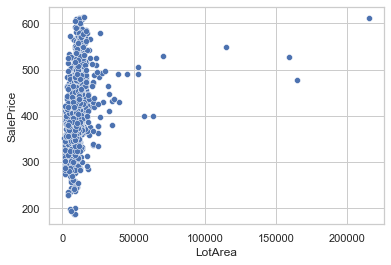

In [142]:
# your responses here
# add cells as needed
sns.scatterplot(y=df.SalePriceAdjusted, x=df.LotArea)

## Numero de cuartos

Despues del area, otra relacion explosiva y que tambien marca mucho el coste de la vivienda es el numero de cuartos

<AxesSubplot:xlabel='TotalRooms', ylabel='SalePrice'>

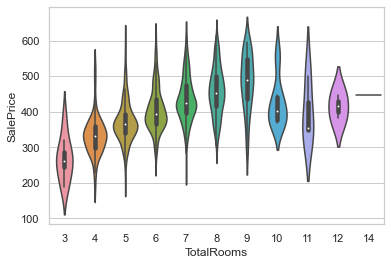

In [147]:
sns.violinplot(x=df.TotalRooms, y=df.SalePriceAdjusted) 


## Vecindario

En tercer lugar, el vecindario es fundamental para el precio de vivienda, a mejor vecindario, mayor sera el precio, considerando que hay lugares que estan enfrente de una escuela o el trabajo, el precio sera aun mayor.

<AxesSubplot:xlabel='SalePrice', ylabel='Neighborhood'>

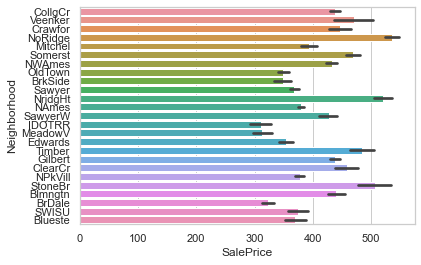

In [148]:
sns.barplot(y = df.Neighborhood, x = df.SalePriceAdjusted, orient = 'h')

## Año

Por ultimo, el año impacta el precio, pero no tan explosivamente como las variables anteriormente mencionadas, mientras se tenga una excelente calidad, el año puede no importar.

<AxesSubplot:xlabel='AgeofHouse', ylabel='SalePrice'>

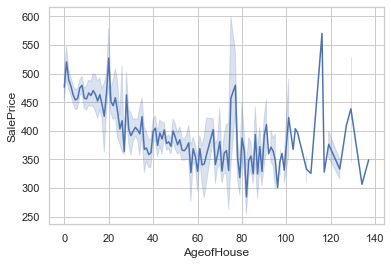

In [150]:
sns.lineplot(x=df.AgeofHouse , y=df.SalePriceAdjusted)